📍 Detected data directory at: ..\Data\rawData
✅ Found species: ['A.gressitti', 'B.karnyi', 'C.megacephala', 'C.nigripes', 'C.rufifacies', 'L.alba', 'S.aquila', 'S.princeps']
📊 Chart saved as 'species_distribution.png'


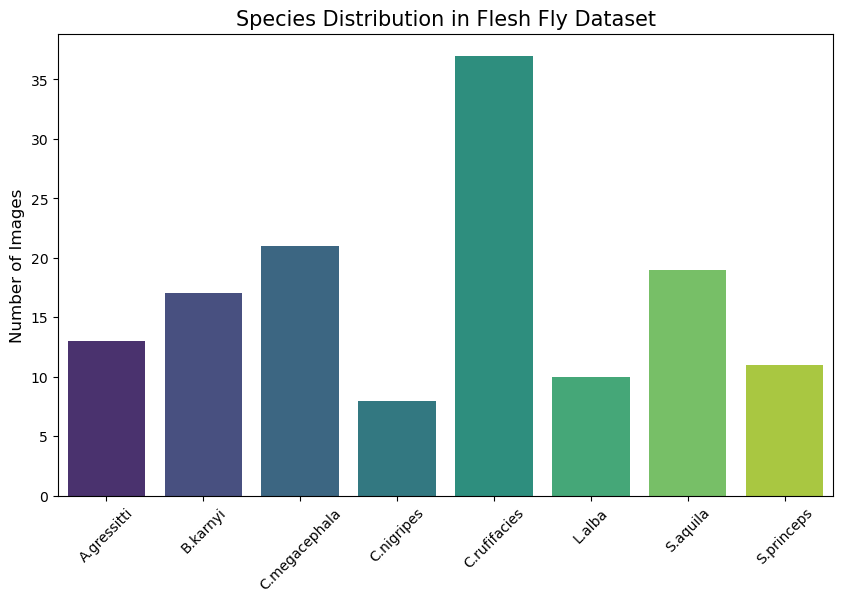

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Update the path to match your new structure: project_root/data/raw/
# This assumes you are running the script from the 'project_root' directory
data_dir = os.path.join('Data', 'rawData')

# Safety check: if running from inside 'src/' or 'notebooks/', look one level up
if not os.path.exists(data_dir) and os.path.exists(os.path.join('..', 'Data', 'rawData')):
    data_dir = os.path.join('..', 'Data', 'rawData')
    print(f"📍 Detected data directory at: {data_dir}")

# 2. Collect the counts
species_counts = {}
if os.path.exists(data_dir):
    for species in os.listdir(data_dir):
        species_path = os.path.join(data_dir, species)
        # Ensure we only count folders (species names), not hidden files
        if os.path.isdir(species_path):
            count = len([f for f in os.listdir(species_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))])
            species_counts[species] = count
            
    print(f"✅ Found species: {list(species_counts.keys())}")
else:
    print(f"❌ Error: Could not find directory '{data_dir}'. Please check your folder structure.")

# 3. Create the bar chart
if species_counts:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(species_counts.keys()), y=list(species_counts.values()), hue=list(species_counts.keys()), legend=False, palette='viridis')
    
    plt.title('Species Distribution in Flesh Fly Dataset', fontsize=15)
    plt.ylabel('Number of Images', fontsize=12)
    plt.xticks(rotation=45)
    
    # Save directly to the current directory (project_root) for your README
    output_filename = 'species_distribution.png'
    plt.savefig(output_filename, bbox_inches='tight') 
    print(f"📊 Chart saved as '{output_filename}'")
    
    plt.show()